# Summer Olympics Data Analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("summer.csv")
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


## 1.In how many cities Summer Olympics is held so far?

In [3]:
cities = df["City"].unique() #unique cities in an array
no_of_cities = len(cities)
print("In {} cities summmer olympics is held so far".format(no_of_cities))

In 22 cities summmer olympics is held so far


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [9]:
# Last 10 Data entries of our dataset

df.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [8]:
# Last 10 Data entries

df.tail(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31155,2012,London,Wrestling,Wrestling Freestyle,"AHMADOV, Emin",AZE,Men,Wg 74 KG,Bronze
31156,2012,London,Wrestling,Wrestling Freestyle,"KAZAKEVIC, Aleksandr",LTU,Men,Wg 74 KG,Bronze
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold
31158,2012,London,Wrestling,Wrestling Freestyle,"EBRAHIM, Karam Mohamed Gaber",EGY,Men,Wg 84 KG,Silver
31159,2012,London,Wrestling,Wrestling Freestyle,"GAJIYEV, Danyal",KAZ,Men,Wg 84 KG,Bronze
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


## 2. Which sport is having most number of Gold Medals so far? (Top 5)

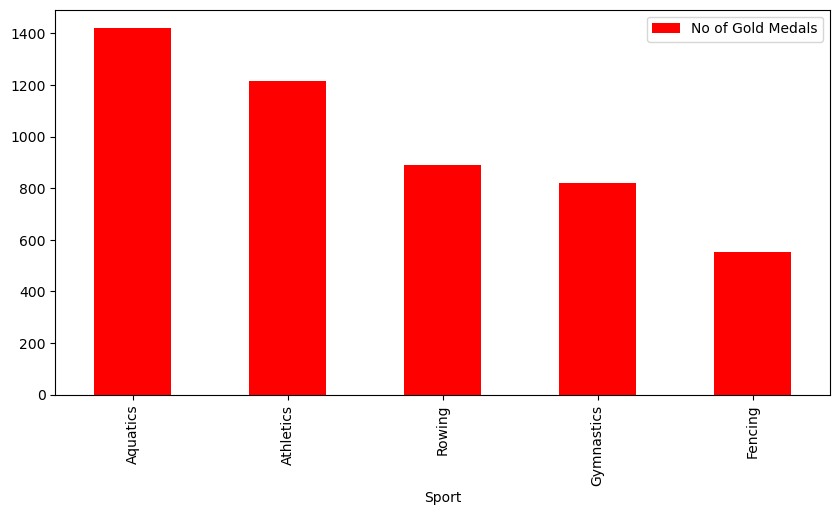

In [12]:
data = []
for sport in df["Sport"].unique() :
    df = df[df["Sport"] == sport]
    data.append([sport,len(df[df["Medal"] == "Gold"])]) 
    df = pd.read_csv("summer.csv")
data = pd.DataFrame(data , columns = ["Sport" , "No of Gold Medals"])
data = data.sort_values(by = "No of Gold Medals",ascending = False).head() 
data = data.plot(x = "Sport",y = "No of Gold Medals",kind = "bar",figsize = (10,5),color = "red") 

## 3. Which sport is having most number of medals so far? (Top 5)

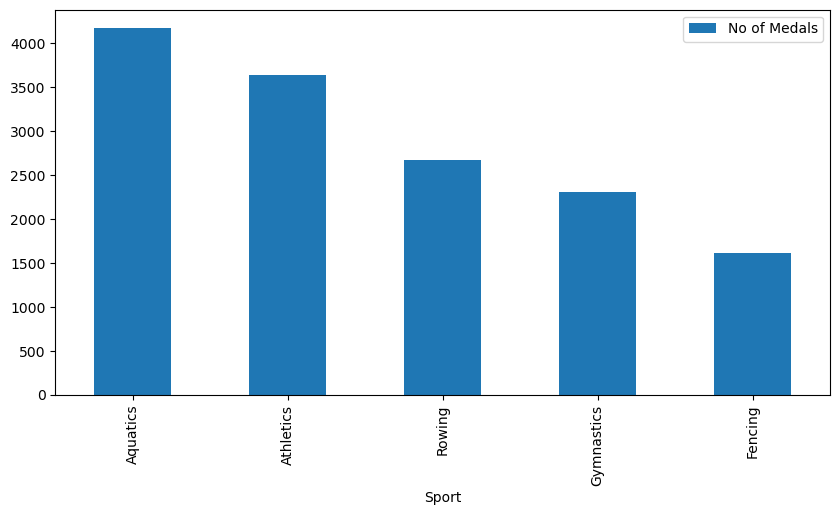

In [13]:
data = []
for sport in df["Sport"].unique() :
    df = df[df["Sport"] == sport]
    data.append([sport, len(df[df["Sport"] == sport])])
    df = pd.read_csv("summer.csv")
data = pd.DataFrame(data , columns = ["Sport" , "No of Medals"]) 
data = data.sort_values(by = "No of Medals",ascending = False).head()
data = data.plot(x = "Sport",y = "No of Medals",kind = "bar",figsize = (10,5))

## 4. Which event is most popular in terms on number of players? (Top 5)


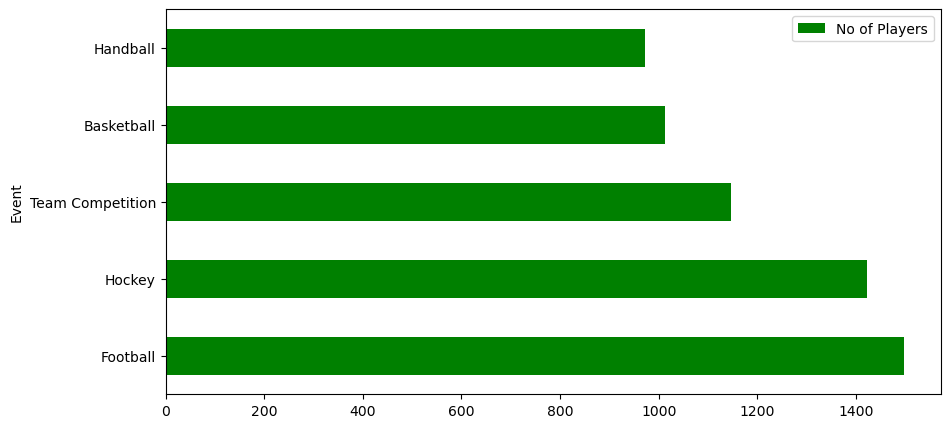

In [18]:
data = []
for event in df["Event"].unique() :
    data.append([event , len(df[df["Event"] == event])])
data = pd.DataFrame(data , columns = ["Event" , "No of Players"]).sort_values(by = "No of Players" , ascending = False).head()
data = data.plot(x = "Event" , y = "No of Players" , color = "green" , kind = "barh" , figsize = (10,5))

## 5. In which year India won first Gold Medal in Summer Olympics?

In [19]:
df = df[df["Country"] == "IND"].sort_values(by = "Year")
df = df[df["Medal"] == "Gold"].head(1)
year = int(df["Year"])
print("In {} India won first gold medal in summer olympics".format(year))

In 1928 India won first gold medal in summer olympics


## 6. Which sport is having most female Gold Medalists? (Top 5)

<AxesSubplot:xlabel='Sport'>

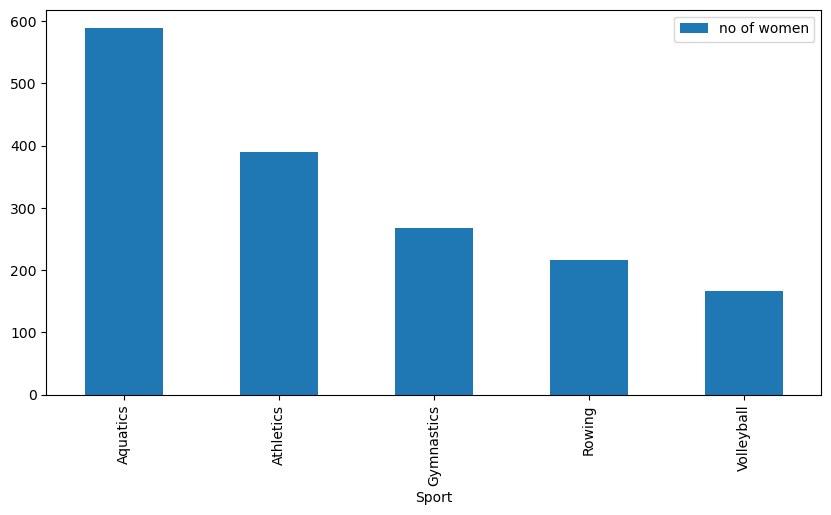

In [15]:
data = []
for sport in df["Sport"].unique() :
    player_df = df[df["Sport"] == sport]
    female_df = player_df[player_df["Gender"] == "Women"]
    gold_medal_df = female_df[female_df["Medal"] == "Gold"]
    data.append([sport,len(gold_medal_df)])
data = pd.DataFrame(data , columns = ["Sport" , "no of women"]).sort_values(by = "no of women" , ascending = False).head()
data.plot(x = "Sport",y = "no of women",kind = "bar",figsize = (10,5))

## 7. Which sport is having most female Gold Medalists? (Top 5)

<AxesSubplot:xlabel='Sport'>

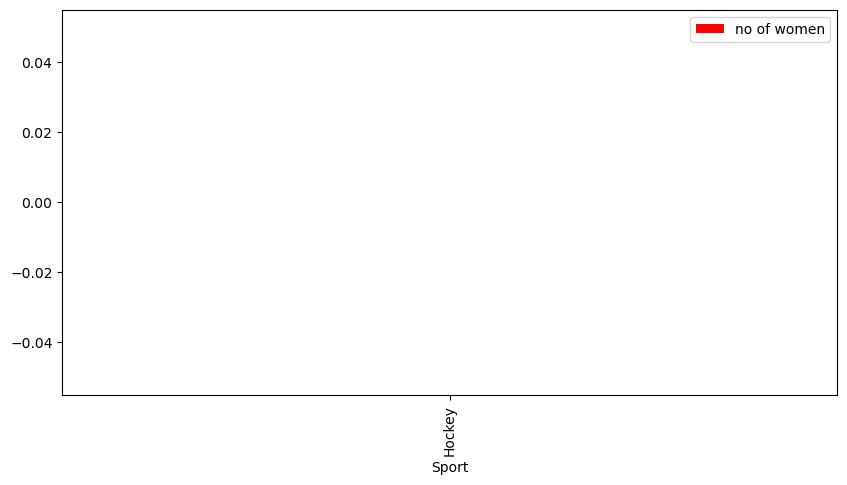

In [22]:
data = []
for sport in df["Sport"].unique() :
    player_df = df[df["Sport"] == sport]
    female_df = player_df[player_df["Gender"] == "Women"]
    gold_medal_df = female_df[female_df["Medal"] == "Gold"]
    data.append([sport,len(gold_medal_df)])
data = pd.DataFrame(data , columns = ["Sport" , "no of women"]).sort_values(by = "no of women" , ascending = False).head()
data.plot(x = "Sport",y = "no of women",color = "red", kind = "bar",figsize = (10,5))

## 8. Distribution of gold medals

C:\Users\shahk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


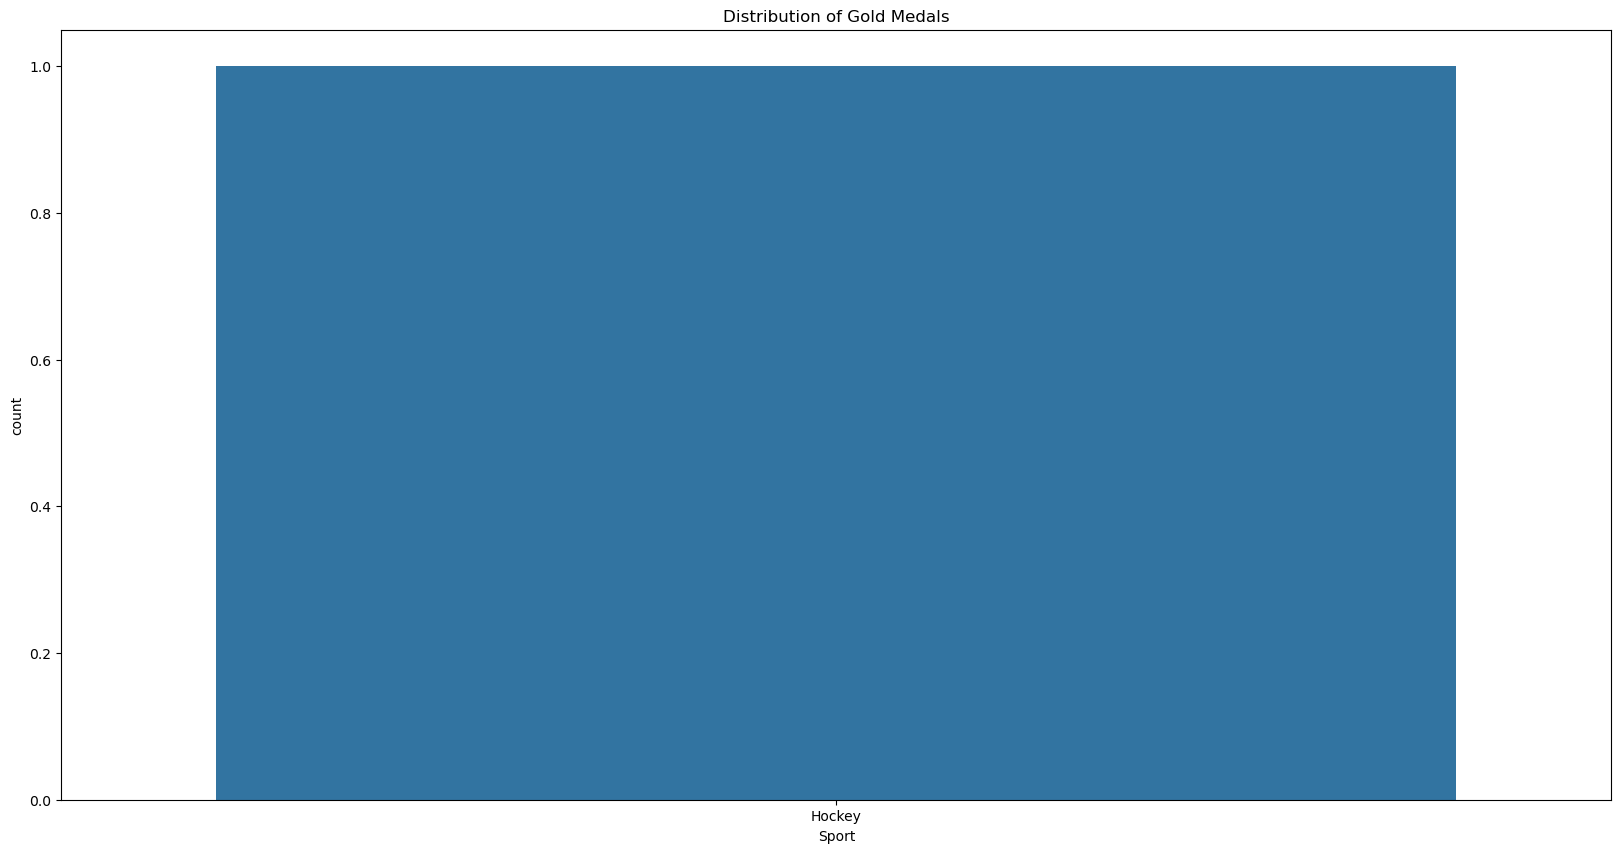

In [32]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(data['Sport'])
plt.show()